In [63]:
from google.colab import files

df = files.upload ()

Saving netflix_titles.csv to netflix_titles (1).csv


In [64]:
# importing packages
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings ('ignore')

In [65]:
# reading the csv and displaying data
df = pd.read_csv ('netflix_titles.csv')

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


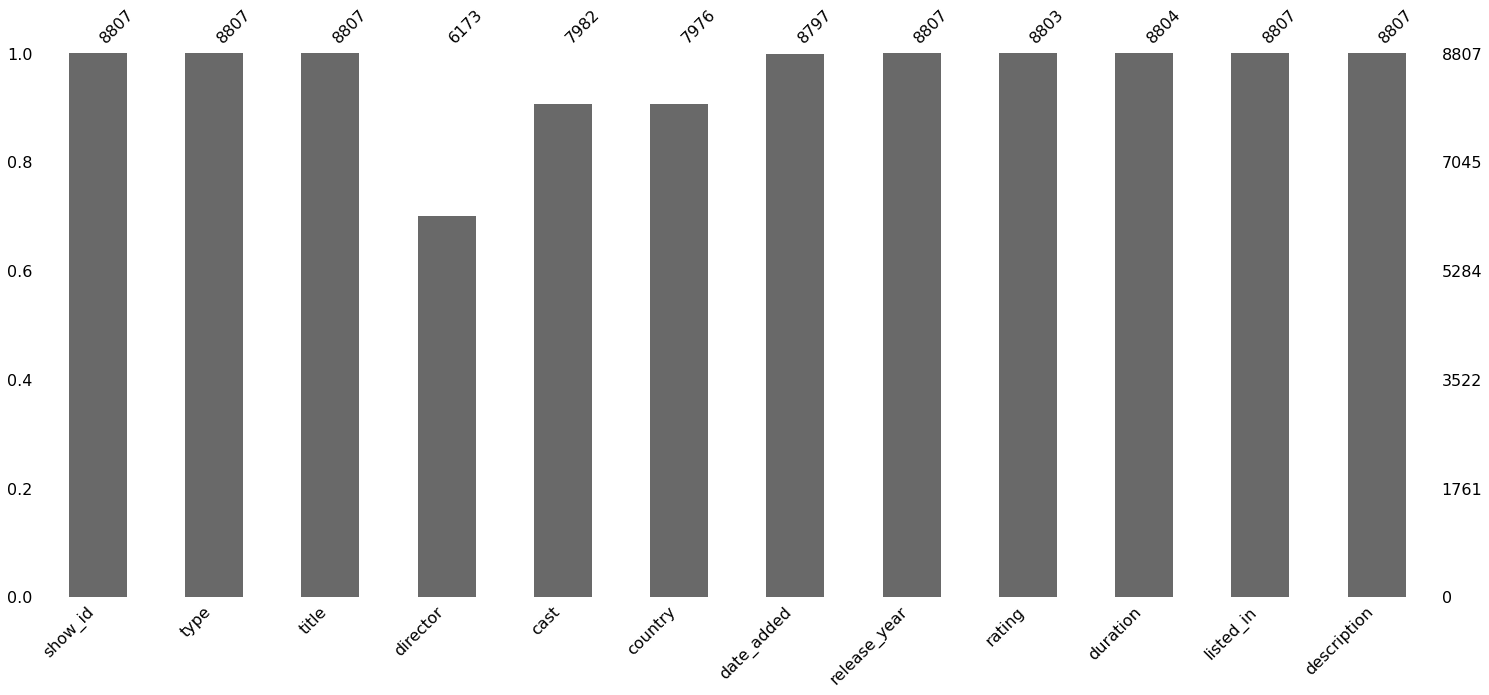

In [66]:
# visualizing the missing data
msno.bar (df)

In [67]:
# % of missing data
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

director's null rate :29.91%
cast's null rate :9.37%
country's null rate :9.44%
date_added's null rate :0.11%
rating's null rate :0.05%
duration's null rate :0.03%


In [68]:
# counting the unique values
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# Data Cleaning

In [69]:
# counting the missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [70]:
# displaying the missing values in rating column
df [df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [71]:
# replacing the missing values manually for rating column
rating_replacements = {
    5989 : 'TV-PG',
    6827 : 'TV-14',
    7312 : 'TV-MA',
    7537 : 'TV-MA'
}

for id, rate in rating_replacements.items():
  df.iloc [id, 8] = rate

df ['rating'].isnull().sum()

0

In [72]:
# displaying the unique values of the rating columns
df ['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [73]:
# chaning the wrong values in rating column
df ['rating'] = df['rating'].replace (['74 min', '84 min', '66 min'], 'TV-MA')

df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [74]:
# adding a new column target_ages
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df ['target_ages'] = df ['rating'].replace (rating_ages)
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens


In [75]:
# dropping director and cast columns
new_df = df.drop (['director', 'cast'], axis = 1)

new_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'target_ages'],
      dtype='object')

In [76]:
# filtering out NaN values from date_added column
new_df = new_df [new_df ['date_added'].notna()]
new_df ['date_added'].isnull().sum()

0

In [77]:
# displaying the missing values in duration column
new_df [new_df ['duration'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,target_ages
5541,s5542,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,TV-MA,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",Adults
5794,s5795,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,TV-MA,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,Adults
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,TV-MA,NaN,Movies,The comic puts his trademark hilarious/thought...,Adults


In [78]:
# replacing the missing values in duration columns
duration_replacements = {
    5541 : '74 min',
    5794 : '84 min',
    5813 : '66 min',
}

for id, dur in duration_replacements.items():
  new_df.iloc [id, 7] = dur

new_df['duration'].isnull().sum()

0

In [79]:
# filling in the missing values in country column with mode
new_df ['country'] = new_df ['country'].fillna(new_df['country'].mode() [0])
new_df ['country'].isnull().sum()

0

In [80]:
# splitting the values in country column by ',' and assiging to new column
new_df ['principle_country'] = new_df ['country'].apply (lambda x: x.split (',') [0])

new_df['principle_country'].unique()

array(['United States', 'South Africa', 'India', 'United Kingdom',
       'Germany', 'Mexico', 'Turkey', 'Australia', 'Finland', 'China',
       'Nigeria', 'Japan', 'Spain', 'France', 'Belgium', 'South Korea',
       'Argentina', 'Russia', 'Canada', 'Hong Kong', 'Italy', '',
       'Ireland', 'New Zealand', 'Jordan', 'Colombia', 'Switzerland',
       'Israel', 'Brazil', 'Taiwan', 'Bulgaria', 'Poland', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', 'Kuwait', 'Malaysia', 'Vietnam',
       'Sweden', 'Lebanon', 'Romania', 'Philippines', 'Iceland',
       'Denmark', 'United Arab Emirates', 'Netherlands', 'Norway',
       'Syria', 'Mauritius', 'Austria', 'Czech Republic', 'Cameroon',
       'Uruguay', 'Kenya', 'Chile', 'Luxembourg', 'Bangladesh',
       'Portugal', 'Hungary', 'Senegal', 'Singapore', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Belarus', 'Ghana', 'Zimbabwe',
       'Puerto Rico', 'Pakistan', 'Cyprus', 'Paraguay', 'Croatia',
       'Cambodia', 'Georgia', 'Sovie

In [81]:
# adding a new column 'year_added'
new_df ['year_added'] = new_df ['date_added']. apply (lambda x: x.split (',') [1])
new_df.head(1)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,target_ages,principle_country,year_added
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,United States,2021


In [82]:
# Checking to ensure no missing values are left
new_df.isnull().sum()

show_id              0
type                 0
title                0
country              0
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
target_ages          0
principle_country    0
year_added           0
dtype: int64

In [83]:
# fixing the data types
new_df ['year_added'] = pd.to_numeric (new_df ['year_added'])

new_df ['type'] = pd.Categorical (new_df ['type'])

new_df ['target_ages'] = pd.Categorical (new_df ['target_ages'], categories = ['Kids', 'Older Kids', 'Teens', 'Adults'])

new_df.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
target_ages          category
principle_country      object
year_added              int64
dtype: object

# Data Visualization

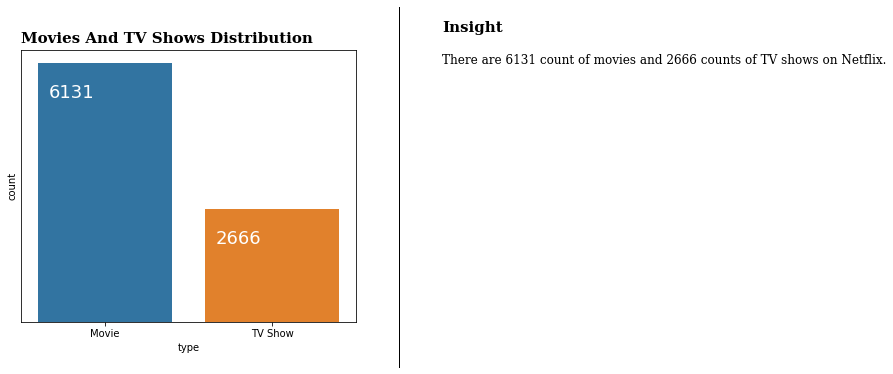

In [84]:
## Analysis of movie and tv shows
fig, ax = plt.subplots (1,1, figsize = (6,5))
ax = sns.countplot (x = 'type' , data = new_df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

ax.set_yticks([])

fig.text(0.125,0.90,'Movies And TV Shows Distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.80,'''
There are 6131 count of movies and 2666 counts of TV shows on Netflix.
'''
,fontfamily='serif',fontsize=12)  

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=1)
fig.lines.extend([l1])

In [85]:
# seperating movies and TV shows base on type
df_movie = new_df [new_df ['type'] == 'Movie']

df_tv = new_df [new_df ['type'] == 'TV Show']

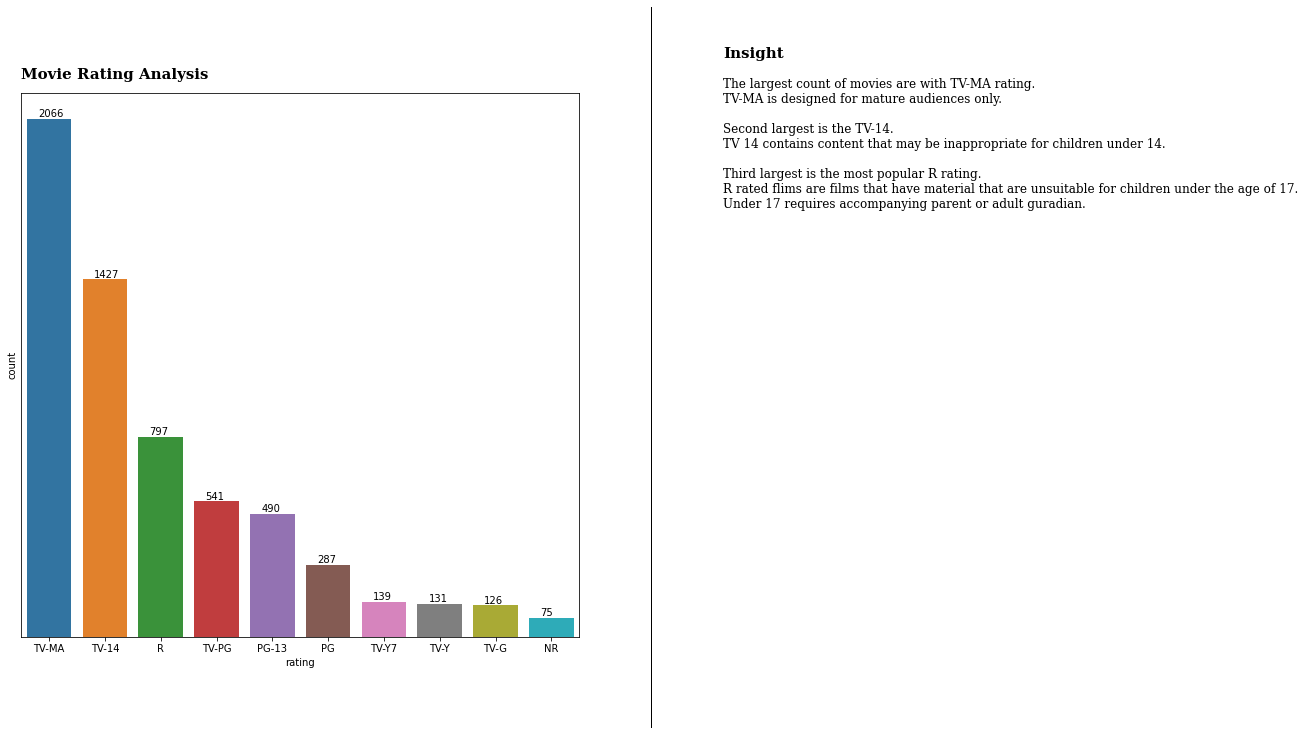

In [86]:
# Movie rating analysis

fig, ax = plt.subplots (1,1, figsize = (10,10))
ax = sns.countplot (x = 'rating' , data = df_movie, order = df_movie['rating'].value_counts().index [0:10])

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='bottom', color='black', size=10)
ax.set_yticks([])

fig.text(0.125,0.90,'Movie Rating Analysis', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.70,'''
The largest count of movies are with TV-MA rating.
TV-MA is designed for mature audiences only.

Second largest is the TV-14.
TV 14 contains content that may be inappropriate for children under 14.

Third largest is the most popular R rating. 
R rated flims are films that have material that are unsuitable for children under the age of 17.
Under 17 requires accompanying parent or adult guradian. 
'''
,fontfamily='serif',fontsize=12)  

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=1)
fig.lines.extend([l1])


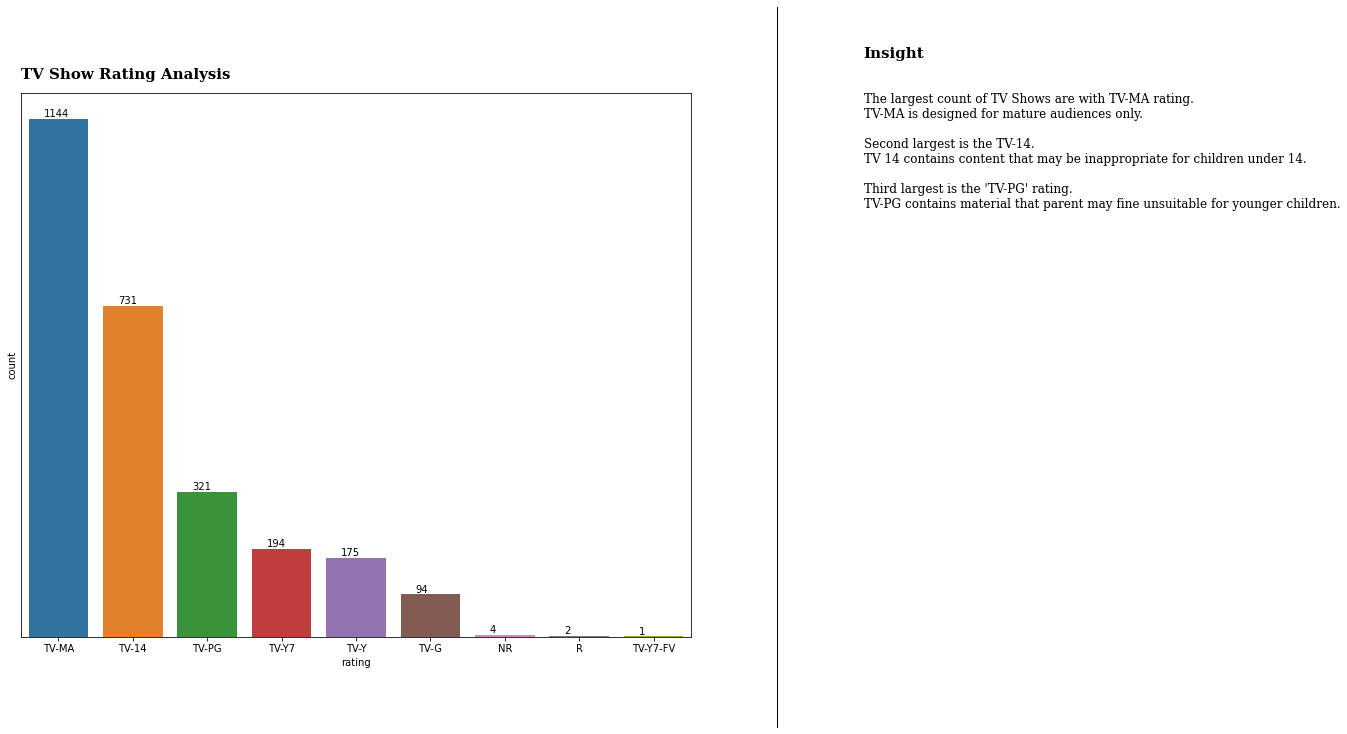

In [87]:
# TV Shows rating analysis

fig, ax = plt.subplots (1,1, figsize = (12,10))
ax = sns.countplot (x = 'rating' , data = df_tv, order = df_tv['rating'].value_counts().index [0:14])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='bottom', color='black', size=10)
ax.set_yticks([])

fig.text(0.125,0.90,'TV Show Rating Analysis', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.70,'''
The largest count of TV Shows are with TV-MA rating.
TV-MA is designed for mature audiences only.

Second largest is the TV-14.
TV 14 contains content that may be inappropriate for children under 14.

Third largest is the 'TV-PG' rating.
TV-PG contains material that parent may fine unsuitable for younger children.
'''
,fontfamily='serif',fontsize=12)  

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=1)
fig.lines.extend([l1])

In [88]:
# sorting out the countires with the most content
country = new_df ['country'].value_counts().sort_values(ascending = False) [0:10]
country 

United States     3642
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

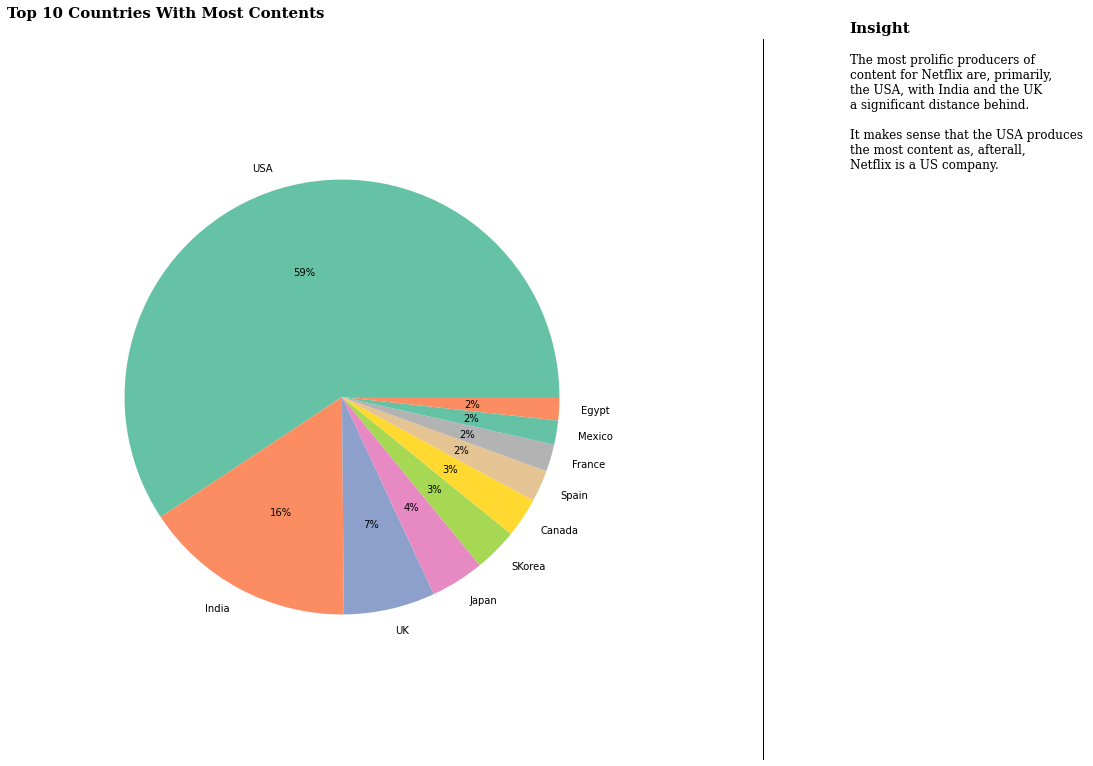

In [89]:
# creating a pie chart for countires with the most content
country_names = ['USA', 'India', 'UK', 'Japan', 'SKorea', 'Canada', 'Spain', 'France', 'Mexico', 'Egypt']
count = [3642,972,418,244,199,181,145,124,110,106]
colors = sns.color_palette ('Set2') [0:10]

fig, ax = plt.subplots (1,1, figsize = (12,10))
ax.pie(count, labels = country_names, colors = colors, autopct='%.0f%%')

fig.text(0.125,1.03,'Top 10 Countries With Most Contents', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.80, '''
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.

It makes sense that the USA produces 
the most content as, afterall, 
Netflix is a US company.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=1)
fig.lines.extend([l1])

Text(0.125, 0.9, 'Movie Duration Analysis')

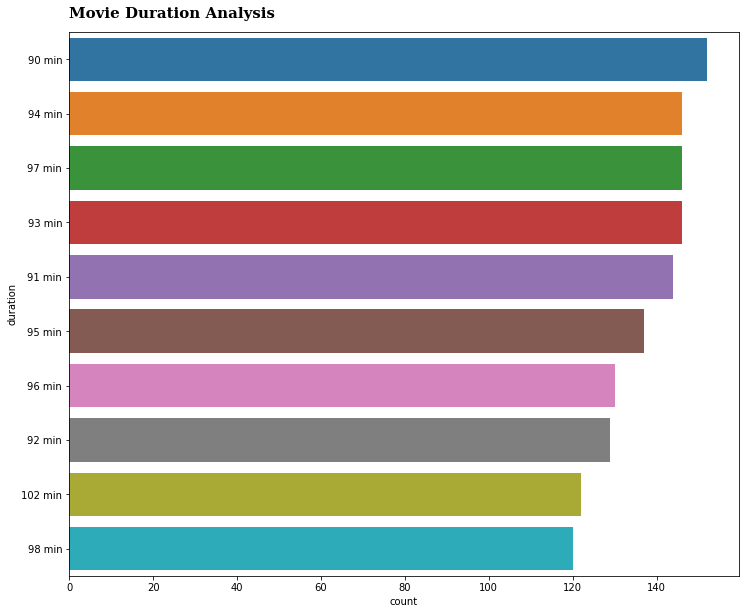

In [90]:
# seperating movies based on duration column and visualizing 
duration_min = new_df [new_df['duration'].str.contains ('min')]

fig, ax = plt.subplots (1,1, figsize = (12,10))

ax = sns.countplot (y = 'duration' , data = duration_min, order = duration_min.duration.value_counts().iloc [:10].index)
fig.text(0.125,0.90,'Movie Duration Analysis', fontfamily='serif',fontsize=15, fontweight='bold')


Text(0.125, 0.9, 'TV Shows Duration Analysis')

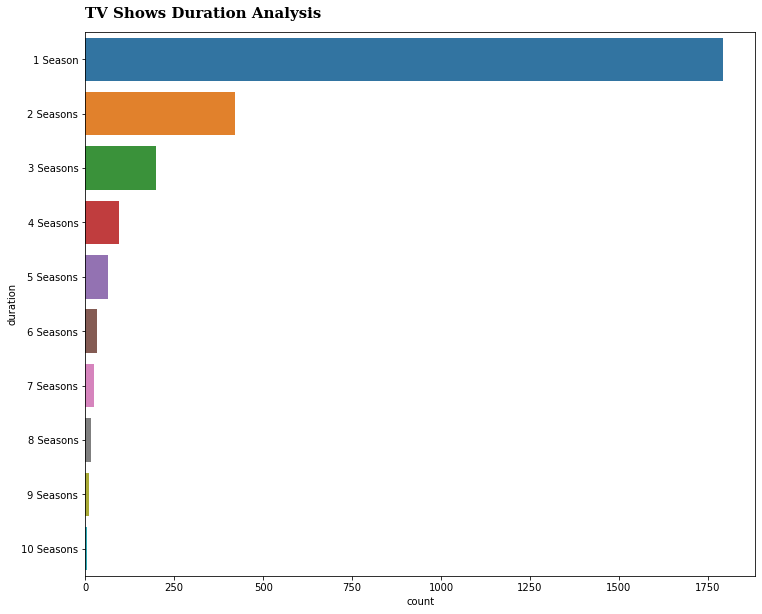

In [91]:
# seperating TV shows based on duration column and visualizing 
duration_min1 = new_df [new_df ['duration'].str.contains ("Season")]

fig, ax = plt.subplots (1,1, figsize = (12,10))

ax = sns.countplot (y = 'duration' , data = duration_min1, order = duration_min1.duration.value_counts().iloc [:10].index)
fig.text(0.125,0.90,'TV Shows Duration Analysis', fontfamily='serif',fontsize=15, fontweight='bold')


In [92]:
# creating a custom dataframe for rating column
def generate_rating_df(new_df):
    rating_df = new_df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

rating_df = generate_rating_df (new_df)
rating_df.head(1)

,rating,target_ages,counts
0,G,Kids,41


In [93]:
# visualizing rating based on target age groups
import plotly.express as px

fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies And TV Shows Based On Target Age Groups',  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()

In [94]:
# creating a custom dataframe for release_year column
def generate_rating_df1(new_df):
    rating_df1 = new_df.groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
    rating_df1 = rating_df1[rating_df1['show_id'] != 0]
    rating_df1.columns = ['release_year', 'type', 'counts']
    rating_df1 = rating_df1.sort_values('release_year')
    return rating_df1

rating_df1 = generate_rating_df1 (new_df)
rating_df1.head(1)

,release_year,type,counts
1,1925,TV Show,1


In [95]:
# visualizing the moves and tv shows based on released year
import plotly.express as px

fig = px.area(rating_df1, x='release_year', y='counts', color='type', title='Movies And TV Shows Distribution On Releasaed Year',  labels={'counts':'COUNT', 'release_year':'YEAR', 'type':'TYPE' })

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()

In [96]:
# creating a custom dataframe for year_added column
def generate_year_added(new_df):
    rating_df2 = new_df.groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()
    rating_df2 = rating_df2[rating_df2['show_id'] != 0]
    rating_df2.columns = ['year_added', 'type', 'counts']
    rating_df2 = rating_df2.sort_values('year_added')
    return rating_df2

rating_df2 = generate_year_added(new_df)
rating_df2.head(1)

,year_added,type,counts
0,2008,Movie,1


In [97]:
# visualizing the movie and tv shows distribution based on year added
fig = px.line (rating_df2, x = 'year_added', y = 'counts', color = 'type', title = 'Content added over the years')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()

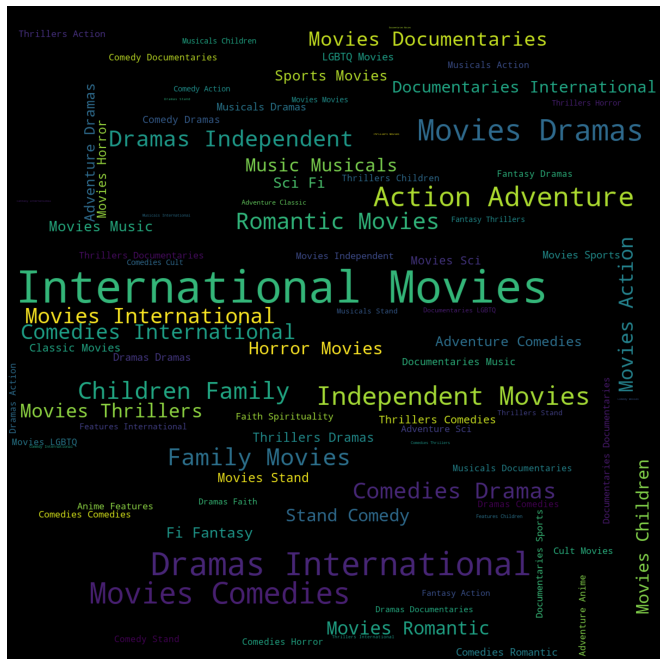

In [98]:
# wordcloud for movies
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movie['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

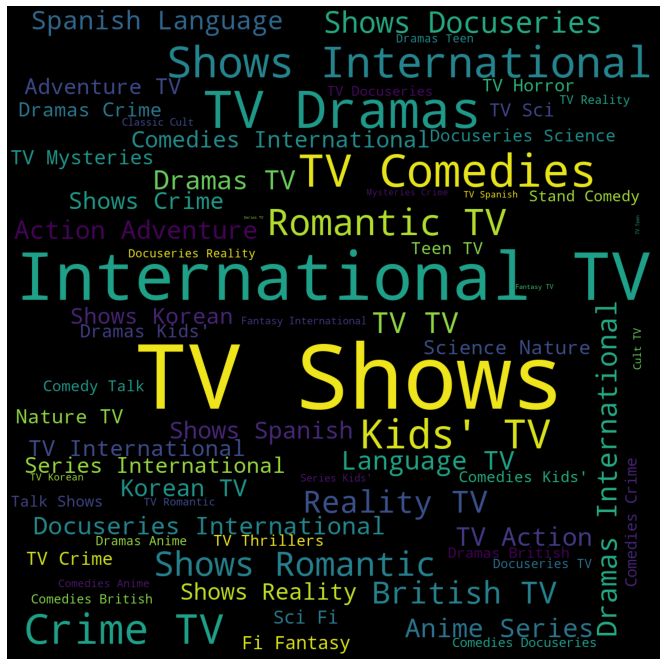

In [99]:
# wordcloud for tv shows
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()